# Coronavirus visualization

Este codigo tiene el objetivo de srapear los datos de la pagina web https://www.worldometers.info/coronavirus/#countries que actualiza cada hora los datos de afectados por coronavirus. Ademas se pretende plotear los graficos usando la libreria plotly para ello.

In [15]:
#Lo primero que hacemos va a ser buscar en la pagina web https://www.worldometers.info/coronavirus/#countries que actualiza cada hora los resultados de nuevos casos. Para eso usaamos beatiful soap para hacer un request y traer la data
#importamos las librerias
import requests
import lxml.html as lh
import pandas as pd
import numpy as np


In [16]:
#Scrapeo la tabla
url='https://www.worldometers.info/coronavirus/#countries'#website
page = requests.get(url)#Store the contents of the website under doc
doc = lh.fromstring(page.content)#clasifico usando el controlador <tr>..</tr> de HTML
tr_elements = doc.xpath('//tr')

#Escribimos el dataframe
import datetime 
currentDT = datetime.datetime.now()


In [17]:
#Ubico las cabeceras
tr_elements = doc.xpath('//tr')#Create empty list
L=(tr_elements)

col=[]
i=0#
q=0
for t in tr_elements[0]:
    if i==2:
        h=1
    elif i==7:
        h=1
    elif i==10:
        h=1
    else:        
        name=t.text_content()
        col.append((name,[]))
       # print(name)
    i+=1
    q=q+1
    
#Estamos borrando de mas rehacemos la busqueda
i=0
if len(col)==7:
    del col
    col=[]
    for t in tr_elements[0]:
        name=t.text_content()
        col.append((name,[]))
        #print(name)
        i+=1

len(col)

9

In [18]:
# Creamos el datarame
#bucle que construye la tabla
for j in range(1,len(tr_elements)):
    
    T=tr_elements[j]
    
    #i es el indice de cada columna
    i=0
    m=0
    #Iteramos a traves de cada elemento de la fila
    for t in T.iterchildren():
        if q==12:
            if i==2:
                h=1
            elif i==7:
                h=1
            elif i==10:
                h=1
            else:
                data=t.text_content() 
                #vemos si la fila esta vacia
                if i>0:
        #lo pasamos a integro
                    try:
                        data=int(data)
                    except:
                        pass
        #sumamos la data encontrada
                col[m][1].append(data)
                m=m+1
                #print(i)
        #vamos a la siguiente columna
            i+=1
        else:
            data=t.text_content() 
            #vemos si la fila esta vacia
            if i>0:
            #lo pasamos a integro
                try:
                    data=int(data)
                except:
                    pass
                #sumamos la data encontrada
            col[m][1].append(data)
            m=m+1
            i+=1
            
[len(C) for (title,C) in col]

[164, 164, 164, 164, 164, 164, 164, 164, 164]

In [19]:
#Creamos el dataframe
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

#La nombramos como el tiempo en el cual tomo el dato
update=currentDT.strftime("%Y-%m-%d_%H_%M")
#path='/mnt/28768037768007B0/projects/mateandocoronavirus/results/'
path='C:\\Users\\hfluvial\\Documents\\projects\\mateandoelcoronavirus\\results\\'
    
filename=currentDT.strftime("%Y-%m-%d_%H_%M_%S")+'.CSV'
#Elimino espacios
df['Country,Other'] = df['Country,Other'].str.strip()

#Extraigo el total de casos
totaldecasos=df[df['Country,Other'] == 'Total:']
totaldecasos = totaldecasos.replace({',': ''}, regex=True)
totaldecasos['TotalCases'] = totaldecasos['TotalCases'].astype(np.float64)

#Elimina del data frame
df=df[df['Country,Other'] != 'Total:']

#Elimino las comas
df = df.replace({',': ''}, regex=True)
#df['NewCases'] = df['NewCases'].replace({'+': ''}, regex=True)

df['TotalCases'] = df['TotalCases'].astype(np.float64)

#Guardo el archivo
#df.to_csv(path+'data/'+filename,index=False)


# Visualizacion

## Grafica de mapa

In [20]:
# ISO nose cuanto
# Encuentra los Code en base a una tabla que esta disponible en la web
import plotly.express as px

##Leemos la base de datos. OJO el archivo debe encontrarse en la misma ubicacion que este codigo
CODE=pd.read_csv("CODE.csv", encoding="ISO-8859-1",sep=",",na_values=[0])

df["Codes"] = ""
#Quito el acento de un lugar 
df['Country,Other']=df['Country,Other'].replace('Réunion', 'Reunion')
df['Country,Other']=df['Country,Other'].replace('Curaçao', 'Curacao')

m=0
for t in df['Country,Other']:
    i=CODE['Country'].tolist().index(t)
    df['Codes'][m]=CODE['Code'].iloc[i]
    m=m+1
#        

#Graficos
fig = px.choropleth(df, locations='Codes',
                       color='TotalCases', # lifeExp is a column of gapminder
                       hover_name='Country,Other', # column to add to hover information
                       color_continuous_scale='Reds',#px.colors.sequential.Plasma,
                       range_color=(0,2000),
                       projection="natural earth")
texto= "Mapa interactivo Coronavirus <br>Fuente:https://www.worldometers.info/coronavirus/#countries</br> update:"+update
fig.update_layout(
    title={
        'text': texto,
        'y':0.975,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(margin={"r":0,"l":0,"b":0})
fig.show()

#Escribe la figura en la carpeta
import plotly.io as pio
pio.write_html(fig, file=path+'graficos/Coronavirus.html', auto_open=False)

C:\Users\hfluvial\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: 'CAR' is not in list

## Grafica de barras

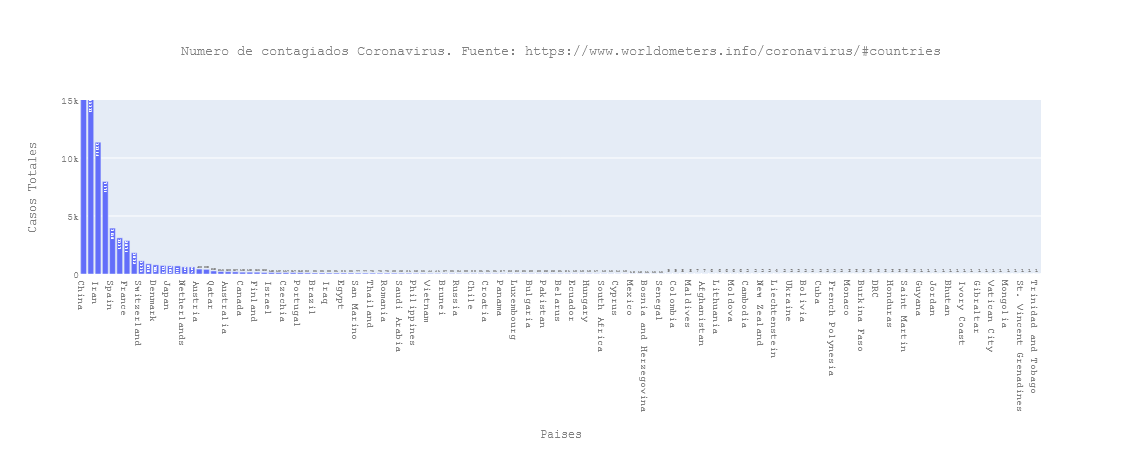

In [24]:
#Codigo Grafica
import plotly.graph_objects as go


# Ploteamos la grafica
fig = go.Figure()
fig = go.Figure(data=[go.Bar(
            x=df['Country,Other'], y=df['TotalCases'],
            text=df['TotalCases'],
            textposition='auto',
        )])
fig.update_layout(
    xaxis_title="Paises",
    yaxis_title="Casos Totales",
    yaxis=dict(range=[0,15000]),
    font=dict(
        family="Courier New, monospace",
        size=6,
        color="#7f7f7f"
    )
)
fig.update_layout(
    title={
        'text': "Numero de contagiados Coronavirus. Fuente: https://www.worldometers.info/coronavirus/#countries",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="#7f7f7f"
    ))

fig.show()

## Grafica de porcentajes

In [26]:
#Codigo Gráfica. Diagrama de Torta
#df['Percent']=df[:,1].div(totaldecasos)

#fig = go.Figure(data=[go.Pie(labels=df['Country,Others'], values=df['Percent'], hole=.2)])
#fig.update_layout(
#    title={
#        'text': " ",
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show()
